<a href="https://colab.research.google.com/github/jhermosillo/diplomado_CDD2019/blob/master/05%20Deep%20Learning/Notebooks/RNA_Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Redes Neuronales con Keras y Tensorflow I</h1>

En esta notebook practicaremos el uso de las redes CNN en varios conjuntos de datos y realizaremos algunas comparaciones con las redes MLP. 

&#128214; <u>Referencias bibliográficas y sitios de interés</u>:
* Ian Goodfellow, Yoshua Bengio, and Aaron Courville. 2016. Deep Learning. The MIT Press.
* [Keras an API for Tensorflow](https://keras.io/getting_started/)
* [Tensorflow: end-to-end open source machine learning platform](https://www.tensorflow.org/)
* [Deep Learning with Keras and TensorFlow](https://www2.mpia-hd.mpg.de/homes/dgoulier/MLClasses/Course%20-%20Deep%20Learning%20with%20Keras%20and%20TensorFlow%20-%20Part%201.html)

Verifiquemos que el entorno de ejecución en Colab sea GPU

In [1]:
import tensorflow as tf

print('GPU presente en: {}'.format(tf.test.gpu_device_name()))

GPU presente en: /device:GPU:0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

In [3]:
import tensorflow as tf
import keras

# 1. MNIST Fashion

## El conjunto de datos

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:
 <ul>
  <li>0 T-shirt/top</li>
  <li>1 Trouser</li>
  <li>2 Pullover</li>
  <li>3 Dress</li>
  <li>4 Coat</li>
  <li>5 Sandal</li>
  <li>6 Shirt</li>
  <li>7 Sneaker</li>
  <li>8 Bag</li>
  <li>9 Ankle boot</li>
</ul> 

Creamos un diccionario con los nombres de las clases

In [4]:
prendas_list = ['Camiseta','Pantalones','Suéter','Vestido','Abrigo','Sandalia','Camisa','Sneaker','Bolsa','Botín']

prendas = dict(enumerate(prendas_list))
prendas

{0: 'Camiseta',
 1: 'Pantalones',
 2: 'Suéter',
 3: 'Vestido',
 4: 'Abrigo',
 5: 'Sandalia',
 6: 'Camisa',
 7: 'Sneaker',
 8: 'Bolsa',
 9: 'Botín'}

Cargamos del dataset

In [5]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

4431872/4422102 [==============================] - 0s 0us/step
X train shape: (60000, 28, 28)
y train shape: (60000,)
X test shape: (10000, 28, 28)
y test shape: (10000,)


## Separación en Entrenamiento, Validación y Prueba

Desde aquí, aplanamos las imágenes en vectores de 784 pixeles.

In [6]:
from tensorflow.keras.utils import to_categorical

num_classes = 10
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# One-hot vectors
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Reserva las últimas 10,000 muestras para validación
X_val = X_train[-10000:]
y_val = y_train[-10000:]
X_train = X_train[:-10000]
y_train = y_train[:-10000]

print('Train size:', X_train.shape[0])
print('Validation size:', X_val.shape[0])
print('Test size:', X_test.shape[0])

Train size: 50000
Validation size: 10000
Test size: 10000


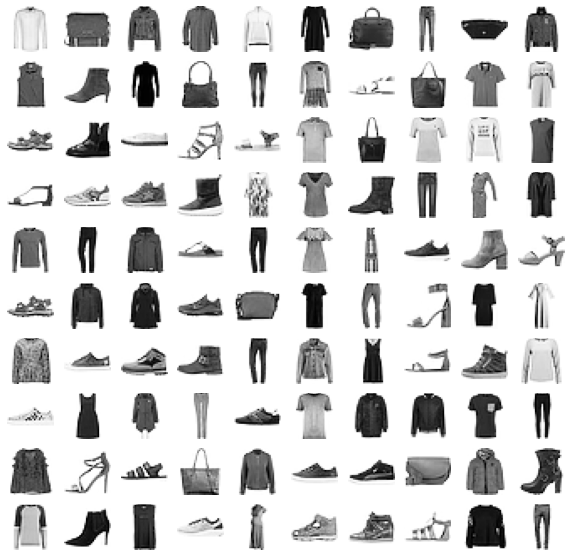

In [7]:
# tamaño del conjunto de instancias
m = y_train.shape[0]

# Elegimos 100 puntos al azar para desplegar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X_train[rand_indices, :].reshape((10,10,-1))

# visualización de los datos
fig, axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(sel[i,j].reshape((28,28)), cmap='Greys')          
        axs[i,j].axis('off')
fig.show()

Visualizamos un ejemplo, junto con su etiqueta.

Sneaker


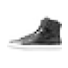

In [9]:
item = 2022
print(prendas[np.argmax(y_train[item])])

fig,ax = plt.subplots(figsize=(1,1))
ax.imshow(X_train[item].reshape((28,28)), cmap='Greys')
ax.axis('off')
fig.show()

## ⭕ Práctica 1

* Entrenar una red MLP para clasificar este conjunto de entrenamiento. Puedes escoger libremente el número de capas, neuronas, funciones de activación, optimizador y épocas. Ten cuidado con el sobre-entrenamiento.
* Grafica las curvas de entrenamiento.
* Reportar el accuracy y la función de pérdida en el conjunto de prueba. Para esto, usa el método `predict`.
* Muestra la matriz de confusión.

In [11]:
# Librerías para el diseño de modelos secuenciales
from keras.models import Sequential
from keras.layers import InputLayer,Dense

#librerías de visualización de grafos de cómputo
import pydotplus
import pydot
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot

# para evitar warnings...      
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

from numpy.random import seed
seed(1)

Define la arquitectura

In [18]:
model1 = Sequential()
# model1.add(InputLayer(input_shape=(X_train.shape[1],), name='Entrada'))

print(model1.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Oculta (Dense)              (None, 5)                 3925      
                                                                 
 Salida (Dense)              (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________
None


Diagrama del modelo

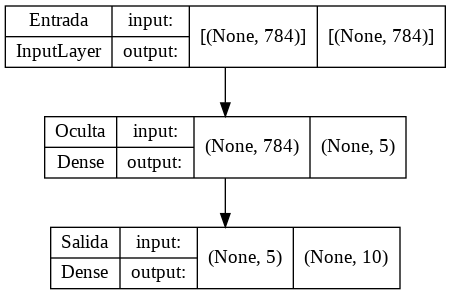

In [19]:
from tensorflow.keras.utils import plot_model

plot_model(model1,show_shapes=True)

Compilar

In [20]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad

EPOCAS = 20
BATCH  = 16 

model1.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [21]:
history = model1.fit(X_train, y_train,
                    epochs=EPOCAS,
                    batch_size=BATCH,
                    validation_split=0.2, # alternativamente: validation_data=(X_val, y_val)
                    verbose=1)

print(model1.metrics_names)
score = model1.evaluate(X_test, y_test)

Epoch 1/20
2500/2500 [==============================] - 9s 3ms/step - loss: 1.8410 - accuracy: 0.4146 - val_loss: 1.5231 - val_accuracy: 0.5349
Epoch 2/20
2500/2500 [==============================] - 6s 3ms/step - loss: 1.3771 - accuracy: 0.5808 - val_loss: 1.2606 - val_accuracy: 0.6103
Epoch 3/20
2500/2500 [==============================] - 6s 3ms/step - loss: 1.1978 - accuracy: 0.6191 - val_loss: 1.1295 - val_accuracy: 0.6437
Epoch 4/20
2500/2500 [==============================] - 8s 3ms/step - loss: 1.0892 - accuracy: 0.6529 - val_loss: 1.0345 - val_accuracy: 0.6679
Epoch 5/20
2500/2500 [==============================] - 9s 4ms/step - loss: 0.9997 - accuracy: 0.6851 - val_loss: 0.9481 - val_accuracy: 0.7063
Epoch 6/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.9173 - accuracy: 0.7109 - val_loss: 0.8681 - val_accuracy: 0.7237
Epoch 7/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.8438 - accuracy: 0.7216 - val_loss: 0.8081 - val_accuracy:

### Curvas de entrenamiento y rendimiento

In [ ]:
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1]*100, 2))

plt.figure(figsize=(5,3),dpi=120)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Curva de Error')
plt.ylabel('error')
plt.xlabel('epoca')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.figure(figsize=(5,3),dpi=120)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Curva de Exactitud')
plt.ylabel('exactitud')
plt.xlabel('epoca')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

Matriz de confusión

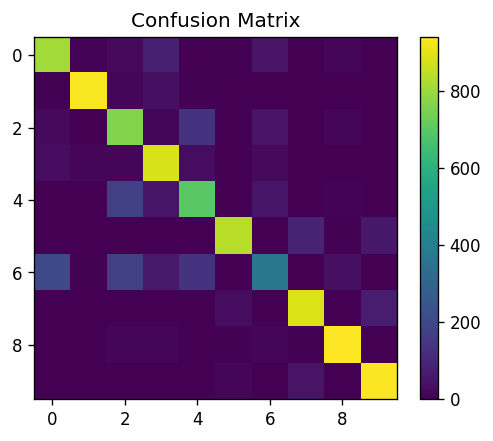

In [ ]:
from sklearn.metrics import confusion_matrix

y_hat = model.predict(X_test)

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_hat, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,4),dpi=120)
plt.imshow(conf_matrix, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

## ⭕ Práctica 2

Entrenar una red CNN para la misma tarea de clasificación. Puedes escoger libremente el número de capas, neuronas, dropout, funciones de activación, optimizador, callbacks y épocas. Ten cuidado con el sobre-entrenamiento.

* Grafica las curvas de entrenamiento.
* Reportar el accuracy y la función de pérdida en el conjunto de prueba. Para esto, usa el método `predict`.
* Muestra la matriz de confusión.
* Compara el rendimiento de la MLP y la CNN.

**Observación**: En este modelo estamos pasando las imágenes en un tensor explícito de numpy. También podrías probar con un generador de imágenes, en este caso, ¿hay una mejora en rendimiento o rapidez?

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

Leemos los datos de entrenamiento

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

 # ----- Re-escalamos los pixels
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

Definir la arquitectura

In [ ]:
# define cnn model
model = Sequential()

'''
Continua con el modelo
'''

Compilar el modelo

In [ ]:
# opt = SGD(lr=0.01, momentum=0.9)  # Puedes definir los parámetros del optimizador
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Entrenar el modelo

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Evaluar el modelo y curvas de aprendizaje

In [ ]:
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))


plt.figure()	
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.show()

# X-rays
































Este conjunto de entrenamiento consta de 5886 imágenes de rayos X de torax divididas en dos clases: Pneumonia y Normal.

Estas imágenes de radiografía de tórax son de pacientes pediátricos de uno a cinco años del Centro Médico de Mujeres y Niños de Guangzhou, Guangzhou. Todas las radiografías de tórax se realizaron como parte de la atención clínica rutinaria de los pacientes.

Para el análisis de las imágenes, se sometieron inicialmente a un control de calidad mediante la eliminación de todas las exploraciones de baja calidad o ilegibles. A continuación, los diagnósticos de las imágenes fueron calificados por dos médicos expertos antes de ser autorizados para el entrenamiento del sistema de IA. Para tener en cuenta cualquier error de clasificación, el conjunto de evaluación también fue revisado por un tercer experto.

Este conjunto de datos se puede encontrar en [Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia).

La copia con la que trabajaremos se puede bajar de Google Drive: https://drive.google.com/file/d/1jbkvQB4L5y3UKkPurNp6nJonSoYbcYbI/view?usp=sharing

In [24]:
!pip install -q gdown

In [26]:
!gdown 1jbkvQB4L5y3UKkPurNp6nJonSoYbcYbI

Downloading...
From: https://drive.google.com/uc?id=1jbkvQB4L5y3UKkPurNp6nJonSoYbcYbI
To: /content/x-rays.zip
100% 1.24G/1.24G [00:10<00:00, 122MB/s]


Extraemos los archivos

In [27]:
from zipfile import ZipFile

fname = '/content/x-rays.zip'

with ZipFile(fname, 'r') as myzip:
    myzip.extractall()
    print('Fertig')

Fertig


Definimos las rutas de los archivos

In [28]:
train_dir = 'x-rays/train'
validation_dir = 'x-rays/val'
test_dir = 'x-rays/test'

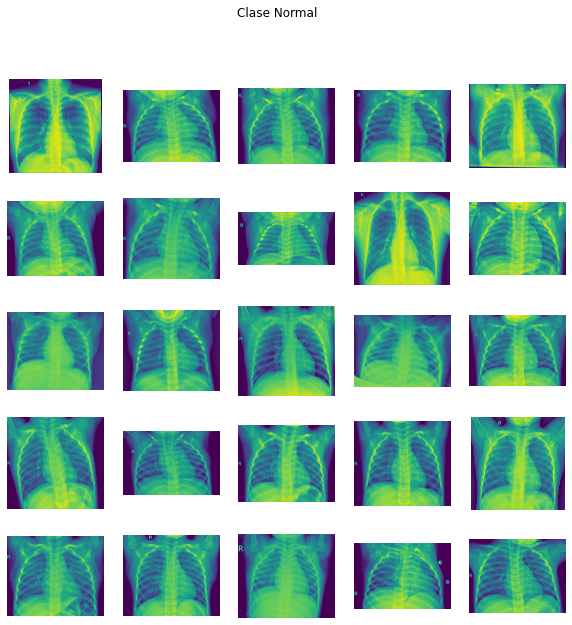

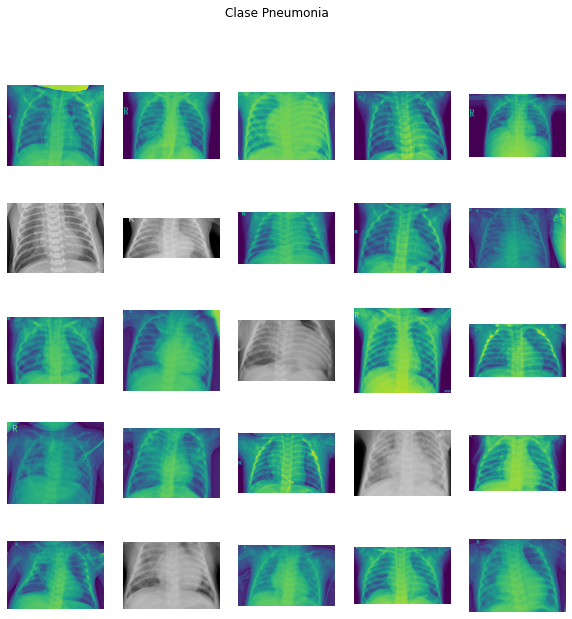

In [30]:
import pathlib
import PIL

train_path = pathlib.Path(train_dir)
val_path = pathlib.Path(validation_dir)
test_path = pathlib.Path(test_dir)

normal_vis = list(train_path.glob("NORMAL/*.jpeg"))

plt.figure(figsize = (10, 10))
plt.suptitle("Clase Normal")
for i in range(25):
    plt.subplot(5, 5, i + 1)
    img = PIL.Image.open(str(normal_vis[i]))
    plt.imshow(img)
    plt.axis(False)
plt.show()

normal_vis = list(train_path.glob("PNEUMONIA/*.jpeg"))

plt.figure(figsize = (10, 10))
plt.suptitle("Clase Pneumonia")
for i in range(25):
    plt.subplot(5, 5, i + 1)
    img = PIL.Image.open(str(normal_vis[i]))
    plt.imshow(img)
    plt.axis(False)
plt.show()

In [64]:
import os, shutil

print('Para entrenamiento:')
train_normal = os.path.join(train_dir,'NORMAL')
print('{} Normal.'.format(len(os.listdir(train_normal))))
train_pneumonia = os.path.join(train_dir,'PNEUMONIA')
print('{} Pneumonia.'.format(len(os.listdir(train_pneumonia))))

print('\nPara validación:')
validation_normal = os.path.join(train_dir,'NORMAL')
print('{} Normal.'.format(len(os.listdir(validation_normal))))
validation_pneumonia = os.path.join(train_dir,'PNEUMONIA')
print('{} Pneumonia.'.format(len(os.listdir(validation_pneumonia))))

print('\nPara prueba:')
test_normal = os.path.join(train_dir,'NORMAL')
print('{} Normal.'.format(len(os.listdir(test_normal))))
test_pneumonia = os.path.join(train_dir,'PNEUMONIA')
print('{} Pneumonia.'.format(len(os.listdir(test_pneumonia))))

Para entrenamiento:
1341 Normal.
3875 Pneumonia.

Para validación:
1341 Normal.
3875 Pneumonia.

Para prueba:
1341 Normal.
3875 Pneumonia.


In [65]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.optimizers import RMSprop

model = Sequential([
    Conv2D(16, 3, activation='relu', 
                           input_shape=(256,256, 3)),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [66]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(256,256),
        batch_size=32,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(256,256),
        batch_size=16,
        class_mode='binary')


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(256,256),
        batch_size=16,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in validation_generator:
    print('Dimensiones del batch de imágenes:', data_batch.shape)
    print('Dimensiones del batch de las etiquetas:', labels_batch.shape)
    break

Dimensiones del batch de imágenes: (16, 256, 256, 3)
Dimensiones del batch de las etiquetas: (16,)


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=163,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=1)

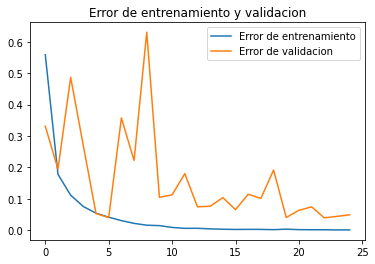

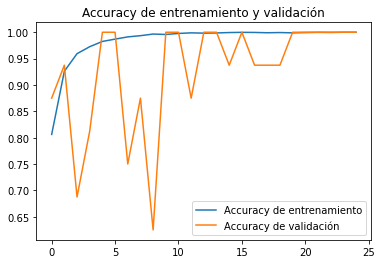

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, label='Error de entrenamiento')
plt.plot(epochs, val_loss, label='Error de validacion')
plt.title('Error de entrenamiento y validacion')
plt.legend()

plt.figure()

plt.plot(epochs, acc, label='Accuracy de entrenamiento')
plt.plot(epochs, val_acc, label='Accuracy de validación')
plt.title('Accuracy de entrenamiento y validación')
plt.legend(loc='best')

plt.show()

In [ ]:
model.evaluate(test_generator,steps=39)

39/39 [==============================] - 6s 152ms/step - loss: 2.2160 - accuracy: 0.7468


[2.215977668762207, 0.7467948794364929]

## Una mejor solución

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [36]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [38]:
train_dir = 'x-rays/train'
validation_dir = 'x-rays/val'
test_dir = 'x-rays/test'

train = get_training_data(train_dir)
val = get_training_data(validation_dir)
test = get_training_data(test_dir)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


In [39]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

Normalizamos el valor de pixeles entre 0 y 1

In [40]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [41]:
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

Usamos aumento de datos con `ImageDataGenerator`

In [42]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

La normalización de lotes `BatchNormalization` es una técnica para entrenar redes neuronales profundas que estandariza las entradas de una capa para cada minilote. Esto tiene el efecto de estabilizar el proceso de aprendizaje y reducir drásticamente el número de épocas de entrenamiento necesarias para entrenar redes profundas.

In [43]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))

model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)      

Se usa el *callback* `ReduceLROnPlateau`. Este callback reduce la tasa de aprendizaje cuando una métrica ha dejado de mejorar.

Los modelos a menudo se benefician de la reducción de la tasa de aprendizaje en un factor de 2-10 una vez que el aprendizaje se estanca. Este callback monitorea una cantidad y si no se ve ninguna mejora durante un número "paciente" de épocas, la tasa de aprendizaje se reduce.

In [45]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [46]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
163/163 [==============================] - 23s 68ms/step - loss: 0.5552 - accuracy: 0.8413 - val_loss: 33.9526 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/12
163/163 [==============================] - 11s 65ms/step - loss: 0.2772 - accuracy: 0.8965 - val_loss: 45.9264 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/12
163/163 [==============================] - ETA: 0s - loss: 0.2324 - accuracy: 0.9155
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 11s 66ms/step - loss: 0.2324 - accuracy: 0.9155 - val_loss: 29.6108 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/12
163/163 [==============================] - 11s 66ms/step - loss: 0.1522 - accuracy: 0.9477 - val_loss: 4.6430 - val_accuracy: 0.5625 - lr: 3.0000e-04
Epoch 5/12
163/163 [==============================] - 11s 66ms/step - loss: 0.1344 - accuracy: 0.9544 - val_loss: 14.8891 - val_accuracy: 0.5000 - lr: 3.0000e-04
Epoch 6/12
163/163 [======================

In [47]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 1s 13ms/step - loss: 0.3029 - accuracy: 0.9071
Loss of the model is -  0.30285122990608215
20/20 [==============================] - 0s 13ms/step - loss: 0.3029 - accuracy: 0.9071
Accuracy of the model is -  90.70512652397156 %


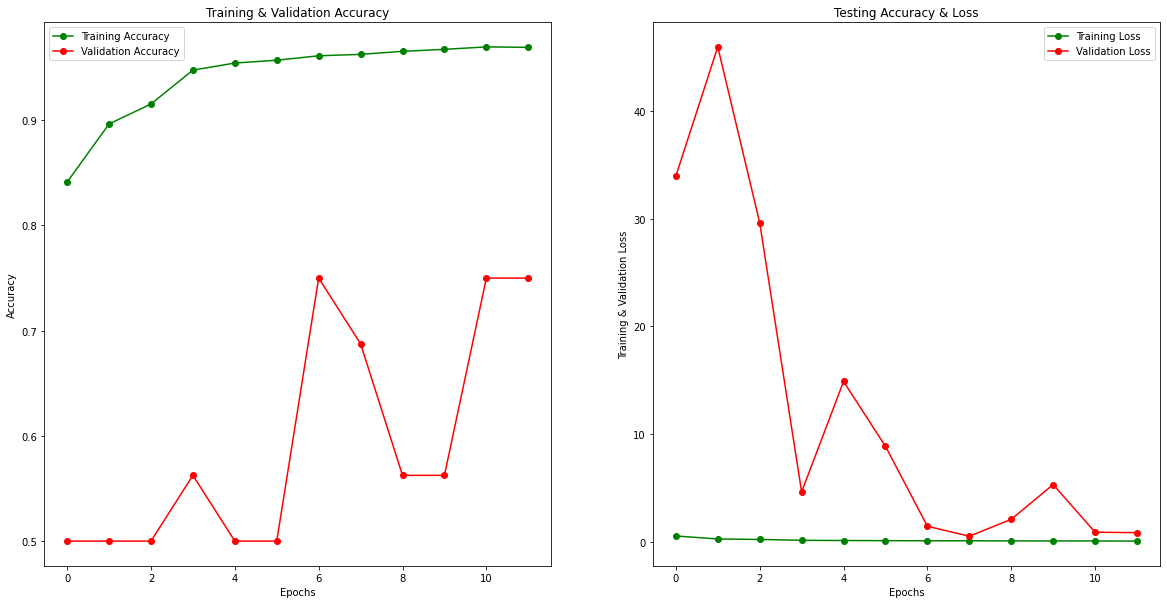

In [48]:
epochs = [i for i in range(12)]

fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [59]:
outputs = model.predict(x_test)
print(outputs.shape)
print(outputs[:10])
# predictions = predictions.reshape(1,-1)[0]
# predictions[:15]

(624, 1)
[[9.9777442e-01]
 [2.2404642e-01]
 [1.0981250e-02]
 [7.9161444e-05]
 [2.3985331e-04]
 [1.6585240e-07]
 [5.4264687e-02]
 [6.2143727e-07]
 [5.6568641e-02]
 [4.4614212e-03]]


In [61]:
predictions = np.round_(outputs)
predictions = predictions.reshape(-1,)
predictions[:10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

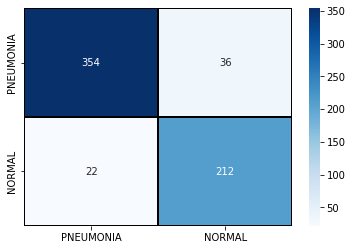

In [63]:
cm = confusion_matrix(y_test,predictions)

plt.figure()
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)
plt.show()